# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **01.11.2024**

Мягкий дедлайн: **13.11.24 23:59**

Жесткий дедлайн: **15.11.24 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0.02 балла).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

1. 
$$
   
   Q(w) = \frac{1}{\ell} \left( (y - Xw)^T (y - Xw) \right) = \frac{1}{\ell} \left( y^T y - 2 y^T Xw + w^T X^T Xw \right)
   
$$
2. Тут глянем как себя поведут конкретные части выражения когда мы их продифф. по w

   $$ 
       y^T y  =  0 
   $$ 
   $$
       -2 y^T Xw  =  -2 X^T y 
   $$
   $$  
        w^T X^T Xw =  2 X^T Xw 
   $$
   

   Соотвественно вот:
   $$
   \nabla Q(w) = \frac{1}{\ell} \left( -2 X^T y + 2 X^T Xw \right).
   $$

3. Ответик
   $$
   \nabla Q(w) = \frac{2}{\ell} \left( X^T Xw - X^T y \right) =  \frac{2}{\ell} X^T (Xw - y)
   $$


`### ваше решение тут ###`

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$. Кроме того, соответственно своему названию, она должна обновлять веса. 

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения **(обратите внимание, что в данном домашнем задании длина шага не фиксируется)**. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение 

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Веса модели надо обновлять внутри функции `update_weights`, она неспроста так называется
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [197]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [198]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [199]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [200]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [201]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/54610/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**:https://contest.yandex.ru/contest/54610/run-report/125220747/


* **StochasticDescent**:https://contest.yandex.ru/contest/54610/run-report/125218324/


* **MomentumDescent**:https://contest.yandex.ru/contest/54610/run-report/125218359/


* **Adam**:https://contest.yandex.ru/contest/54610/run-report/125218381/


* **LinearRegression**:https://contest.yandex.ru/contest/54610/run-report/125218516/

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте (и напишите): какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте (и напишите): какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [202]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\1\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [203]:
import numpy as np
import pandas as pd  # при желании, можете заменить на polars/pyspark или что угодно, что вам нравится

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [204]:
data = pd.read_csv('autos.csv')  # разумеется, если вы используете не pandas, это надо поменять

In [205]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

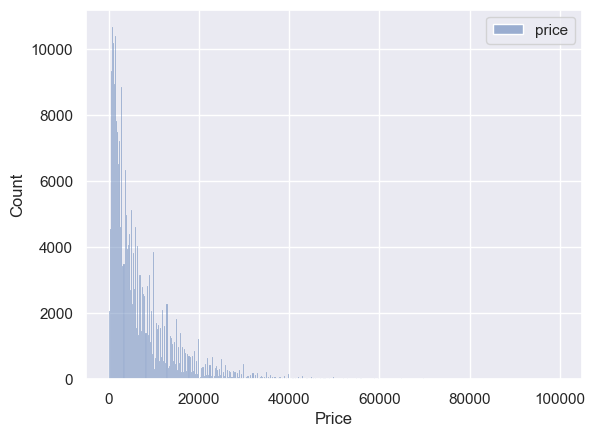

In [206]:
sns.histplot(data[['price']])
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

Очев что выбросы есть (отсеку думаю где то на 25к и в самрм еачаое). Логарифмировать тоже буду чтобы все было распределено нормальным и не было такого дикого разброса (при логарф у нас менее чувсвительно все).

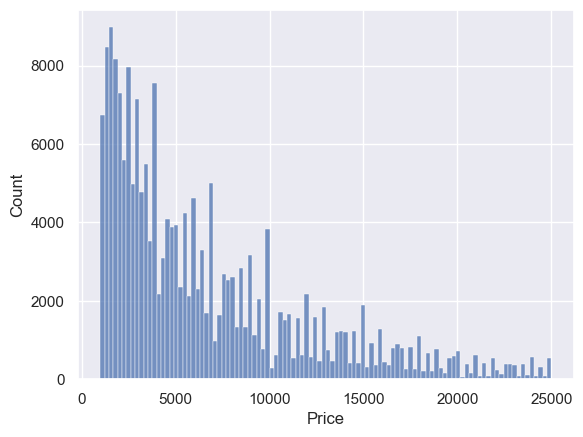

In [207]:
data = data[(data['price'] < 25000) & (data['price'] > 1000)]
sns.histplot(data['price'])
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

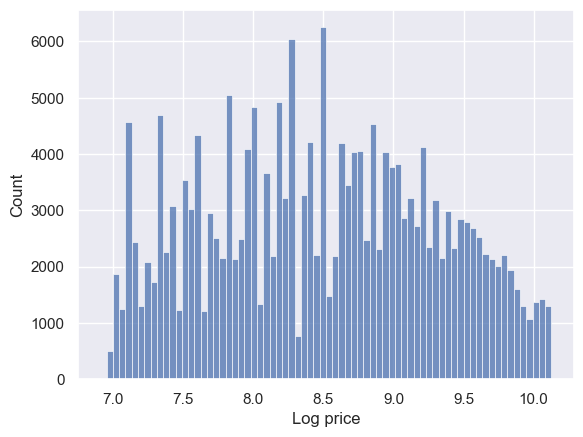

In [208]:
data['log_price'] = np.log(data['price'])
sns.histplot(data['log_price'])
plt.xlabel('Log price')
plt.ylabel('Count')
plt.show()

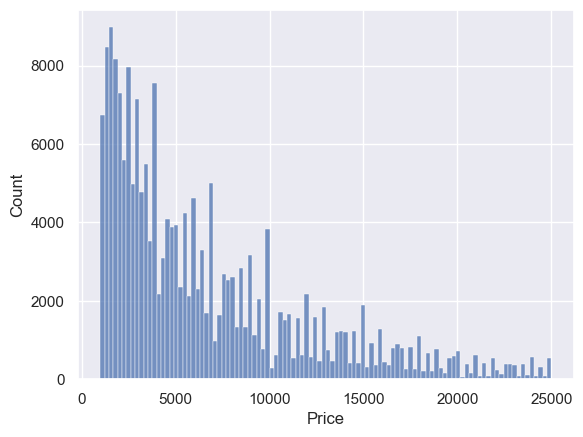

In [209]:
data = data[(data['price'] < 25000) & (data['price'] > 1000)]
sns.histplot(data['price'])
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

In [210]:
data.dtypes

brand                 object
model                 object
vehicleType           object
gearbox               object
fuelType              object
notRepairedDamage     object
powerPS                int64
kilometer              int64
autoAgeMonths          int64
price                  int64
log_price            float64
dtype: object

In [211]:
data['kilometer'].value_counts()

kilometer
150000    118525
125000     23450
100000      9992
90000       8392
80000       7568
70000       6725
60000       6165
50000       5319
40000       4303
30000       3685
20000       2949
5000        1171
10000        904
Name: count, dtype: int64

In [212]:
data['powerPS'].value_counts()

powerPS
75     10956
140    10385
150    10237
170     8194
116     8185
       ...  
551        1
417        1
293        1
421        1
473        1
Name: count, Length: 373, dtype: int64

In [213]:
data['autoAgeMonths'].value_counts()

autoAgeMonths
118    1629
130    1555
117    1538
120    1524
144    1443
       ... 
580       1
583       1
592       1
499       1
533       1
Name: count, Length: 589, dtype: int64

Очев что powerPS и autoAge.. нумерикал фичи, тк там важен порядок. А вот километр категораильный скорее. В other я думал мб добавить что то но решил что лучше категориальный и нумерикал онли.

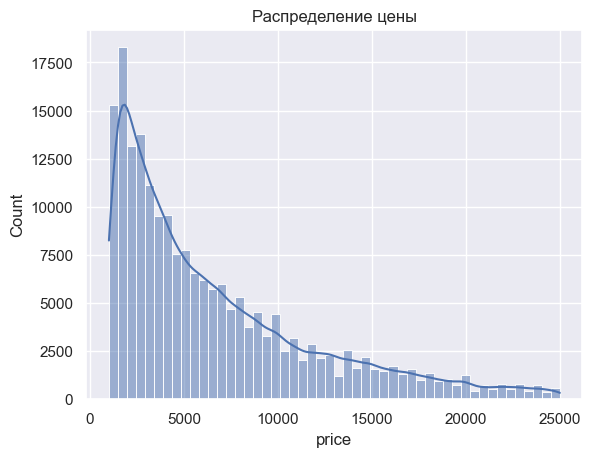

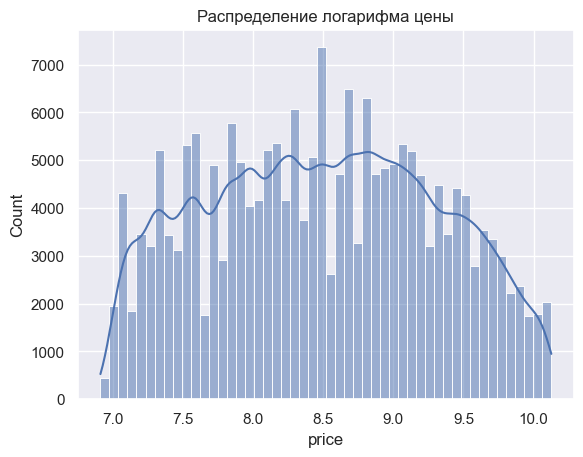

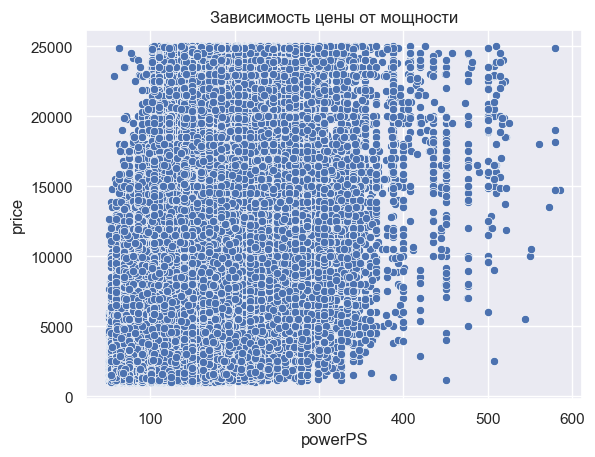

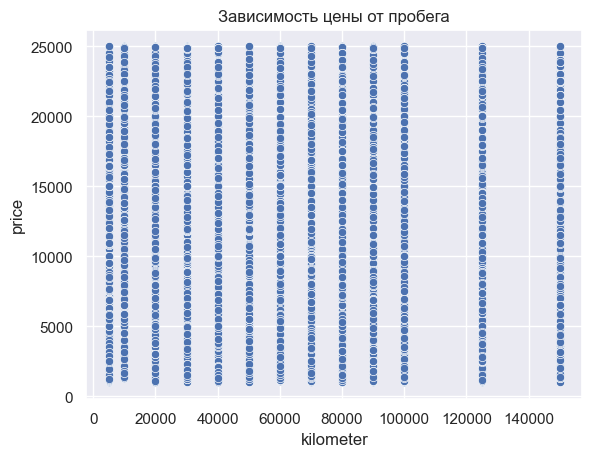

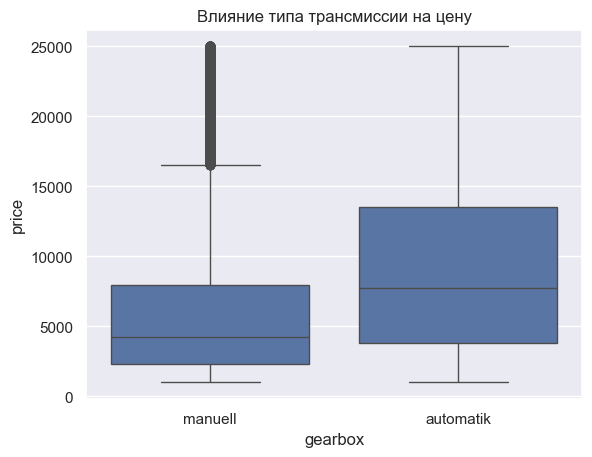

In [214]:
sns.histplot(data['price'], kde=True, bins=50)
plt.title('Распределение цены')
plt.show()

sns.histplot(np.log1p(data['price']), kde=True, bins=50)
plt.title('Распределение логарифма цены')
plt.show()

sns.scatterplot(x=data['powerPS'], y=data['price'])
plt.title('Зависимость цены от мощности')
plt.show()

sns.scatterplot(x=data['kilometer'], y=data['price'])
plt.title('Зависимость цены от пробега')
plt.show()

sns.boxplot(x=data['gearbox'], y=data['price'])
plt.title('Влияние типа трансмиссии на цену')
plt.show()

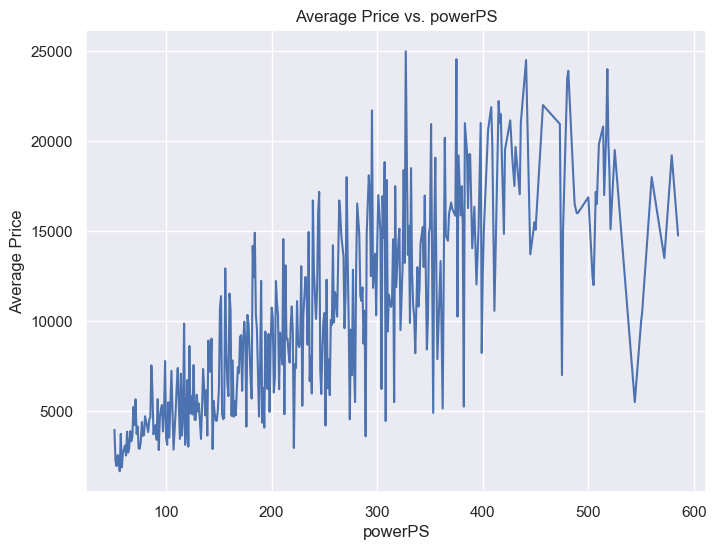

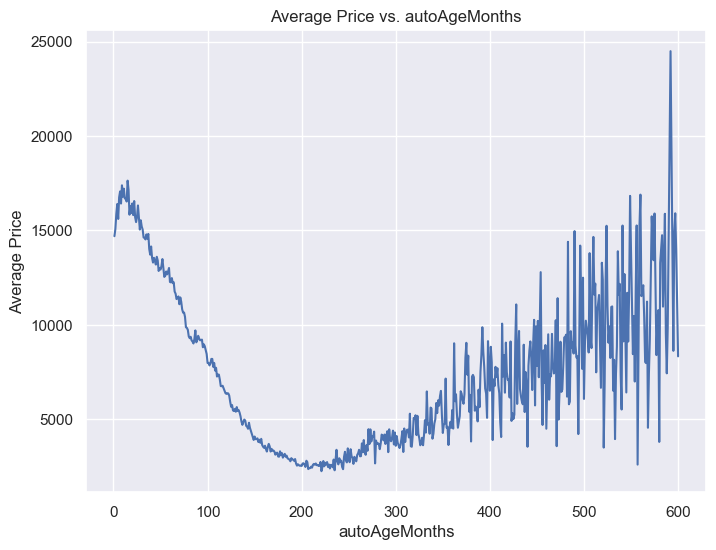

In [215]:
for col in numeric:
    plt.figure(figsize=(8, 6))
    avg_price_data = data.groupby(col)['price'].mean().reset_index()
    sns.lineplot(x=col, y='price', data=avg_price_data)
    plt.title(f'Average Price vs. {col}')
    plt.xlabel(col)
    plt.ylabel('Average Price')
    plt.show()

In [216]:
categorical = ['model', 'brand', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage', 'kilometer']
numeric = ['powerPS', 'autoAgeMonths']
other = []

# YOUR CODE (EDA):

Нуу я думаю что тут со всеми категориальными данными ок, ничего убирать не буду. Единственное конечно я переведу категориальные бинарные в 0, 1. Остальные категориальные энкойдю, чтобы много места не занимали ну и очев заскейлю числовые. Но я конечно не совсем еще уверен в необходимости autoagemonths, его график буквально выше и по нему видно что там какая то вакханалия.

In [217]:
data['notRepairedDamage'].value_counts()

notRepairedDamage
nein    186427
ja       12721
Name: count, dtype: int64

In [218]:
data['gearbox'] = data['gearbox'].map({'manuell': 0, 'automatik': 1})
data['notRepairedDamage'] = data['notRepairedDamage'].map({'nein': 0, 'ja': 1})
data = data[(data['powerPS'] > 10) & (data['powerPS'] < 500)]
data = data[(data['autoAgeMonths'] > 0) & (data['autoAgeMonths'] < 550)]


In [219]:
data['bias'] = 1
other += ['bias']

x = data[categorical + numeric + other]
y = data['price']

In [220]:
%pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\1\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [221]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

In [222]:
# YOUR CODE (data split into train/val/test):
from sklearn.model_selection import train_test_split
y = data['log_price'].to_numpy()
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)
xtest, xval, ytest, yval = train_test_split(xtest, ytest, test_size=0.5, random_state=7)

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
lambdas = np.logspace(-5, 0, num=10)

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': x.shape[1],
        'lambda_': 0
    }
}

model_res_lambda = dict()

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    print(f'=============================\nEvaluating method: {descent_name}\n=============================')
    
    descent_config['descent_name'] = descent_name
    metrics, it_num, best_param = 1e10, 0, 0
    
    for value in lambdas:
        print(f"  Testing lambda = {value:.5f}")
        descent_config['kwargs']['lambda_'] = value
        
        regression = LinearRegression(
            descent_config=descent_config
        )
        
        regression.fit(xtrain, ytrain)
        
        y_pred_val = regression.predict(xval)
        mse = mean_squared_error(y_pred_val, yval)  
        
        y_train_pred = regression.predict(xtrain)
        y_test_pred = regression.predict(xtest)
        r2_train = r2_score(ytrain, y_train_pred)
        r2_test = r2_score(ytest, y_test_pred)
        mse_train = mean_squared_error(y_train_pred, ytrain)
        mse_test = mean_squared_error(y_test_pred, ytest)
        
        print(f"Validation MSE = {mse:.5f}, Train MSE = {mse_train:.5f}, Test MSE = {mse_test:.5f}")
        print(f"Train R^2 = {r2_train:.5f}, Test R^2 = {r2_test:.5f}")
        
        if mse < metrics:
            print(f"    New best lambda found: {value:.5f} with Validation MSE = {mse:.5f}")
            metrics, it_num = mse, regression.descent.lr.iteration
            loss = regression.loss_history
            best_param = value
        
    model_res_lambda[descent_name] = {
        "param": best_param,
        "r2": [r2_train, r2_test],
        "mse": [mse_train, mse_test],
        "loss": loss,
        "it_num": it_num
    }
    
    print(f"Best lambda for {descent_name}: {best_param:.5f}")
    print(f"Train MSE: {mse_train:.5f}, Test MSE: {mse_test:.5f}")
    print(f"Train R^2: {r2_train:.5f}, Test R^2: {r2_test:.5f}")
    print(f"Iterations to convergence: {it_num}\n")


Evaluating method: full
  Testing lambda = 0.00001
    Validation MSE = 20.06242, Train MSE = 20.04465, Test MSE = 20.08447
    Train R^2 = -29.04886, Test R^2 = -29.08931
    New best lambda found: 0.00001 with Validation MSE = 20.06242
  Testing lambda = 0.00004
    Validation MSE = 33.55573, Train MSE = 33.57155, Test MSE = 33.57906
    Train R^2 = -49.32699, Test R^2 = -49.30606
  Testing lambda = 0.00013
    Validation MSE = 14.85153, Train MSE = 14.87524, Test MSE = 14.96365
    Train R^2 = -21.29942, Test R^2 = -21.41761
    New best lambda found: 0.00013 with Validation MSE = 14.85153
  Testing lambda = 0.00046
    Validation MSE = 26.31190, Train MSE = 26.29123, Test MSE = 26.28557
    Train R^2 = -38.41309, Test R^2 = -38.37941
  Testing lambda = 0.00167
    Validation MSE = 17.22616, Train MSE = 17.26687, Test MSE = 17.33387
    Train R^2 = -24.88471, Test R^2 = -24.96852
  Testing lambda = 0.00599
    Validation MSE = 9.75920, Train MSE = 9.77983, Test MSE = 9.84547
    Tra

### Задание 5.2. Сравнение методов (1 балла) 

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

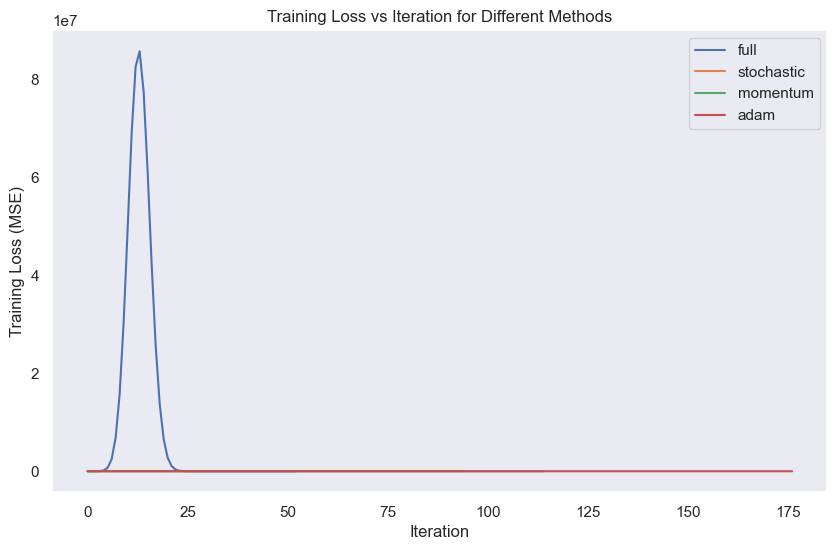

Method       Best Lambda  Train MSE    Test MSE     Train R^2    Test R^2     Iterations  
full         1.00000      0.24422      0.24824      0.63389      0.62811      52          
stochastic   0.27826      9037.09787   9057.35861   -13546.48028 -13568.17183 94          
momentum     1.00000      0.18750      0.19142      0.71892      0.71323      114         
adam         1.00000      0.15416      0.15866      0.76890      0.76231      176         


In [224]:
plt.figure(figsize=(10, 6))

for method, result in model_res_lambda.items():
    loss_history = result['loss']
    plt.plot(range(len(loss_history)), loss_history, label=method)

plt.xlabel('Iteration')
plt.ylabel('Training Loss (MSE)')
plt.title('Training Loss vs Iteration for Different Methods')
plt.legend()
plt.grid()
plt.show()

print(f"{'Method':<12} {'Best Lambda':<12} {'Train MSE':<12} {'Test MSE':<12} {'Train R^2':<12} {'Test R^2':<12} {'Iterations':<12}")
print("=" * 70)
for method, result in model_res_lambda.items():
    print(f"{method:<12} {result['param']:<12.5f} {result['mse'][0]:<12.5f} {result['mse'][1]:<12.5f} {result['r2'][0]:<12.5f} {result['r2'][1]:<12.5f} {result['it_num']:<12}")



Ээ я честно не оч понимаю что я делаю не так с графиком, ибо он выводится как какой то бред, но таблица ок. По таблице можно заметить что моментум и адам сильно лучше остальных двух методов (как и значение ошибки так и коэффициент детерминации). Но дефолт градиент сходится за меньшее кол-во шагов. Бтв меня смущают значения случайного град спуска, но я уже 10 раз переписывал код поэтому оставлю как есть.

`### ваше решение тут ###`

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча. _(под сходимостью понимается достижение критерия останова)_
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [225]:
import time

In [ ]:
lambda_stoch = model_res_lambda['stochastic']['param']  
batch_sizes = np.arange(5, 500, 10)

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': x.shape[1],
        'lambda_': lambda_stoch,
        'batch_size': 0
    }
}

def evaluate_batch_sizes(batch_sizes, descent_config, xtrain, ytrain, k=10):
    times = []
    avg_conv = []

    for size in batch_sizes:
        total_time = 0
        total_iterations = 0

        descent_config['kwargs']['batch_size'] = size

        for _ in range(k):
            regression = LinearRegression(descent_config=descent_config)
            
            start_time = time.time()
            regression.fit(xtrain, ytrain)
            total_time += time.time() - start_time
            
            total_iterations += regression.descent.lr.iteration

        times.append(total_time / k)
        avg_conv.append(total_iterations / k)

    return times, avg_conv


times, avg_conv = evaluate_batch_sizes(batch_sizes, descent_config, xtrain, ytrain)

for size, t, conv in zip(batch_sizes, times, avg_conv):
    print(f"Batch size: {size:3d} | Avg. Time: {t:.4f} sec | Avg. Iterations: {conv:.2f}")


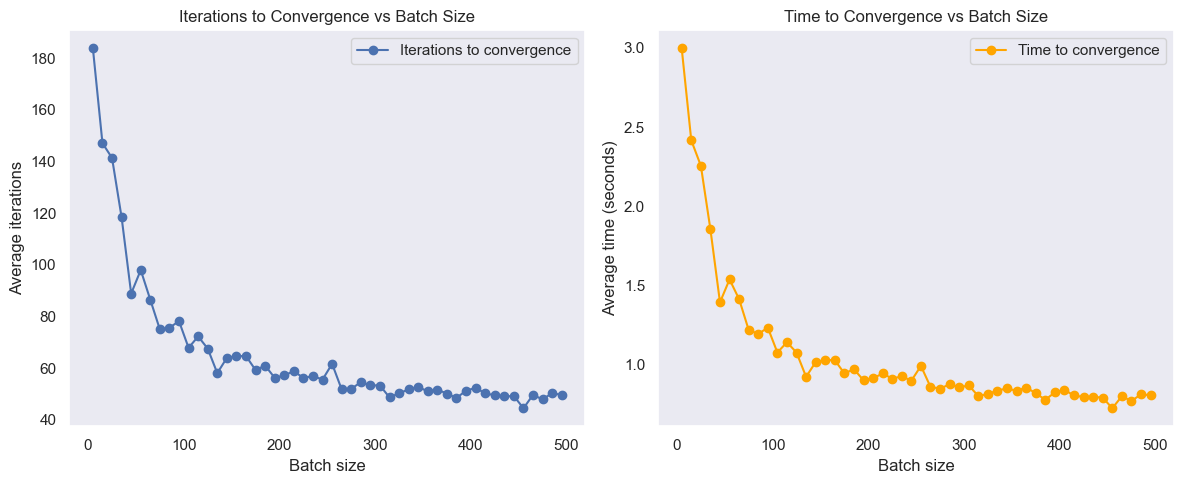

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(batch_sizes, avg_conv, marker='o', label='Iterations to convergence')
plt.xlabel('Batch size')
plt.ylabel('Average iterations')
plt.title('Iterations to Convergence vs Batch Size')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(batch_sizes, times, marker='o', color='orange', label='Time to convergence')
plt.xlabel('Batch size')
plt.ylabel('Average time (seconds)')
plt.title('Time to Convergence vs Batch Size')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


Честно сказать мне кажется у меня лютое гавно вышло, но попробую по нему сделать вывод - чем больше размер батча тем меньше надо времени(и итераций соотвественно) для сходимости. Но прикол что после размера батча 300 наблюдается маленькая вакханалия (значения чуть летают верх вниз), поэтому вот. 

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит иссл едовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**:https://contest.yandex.ru/contest/54610/run-report/125218534/

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

Ни в коем случае не запускать, у меня 40 минут ячейка работала... ну эт я даун наверное но энивей

In [ ]:
# YOUR CODE:
lambdas = np.logspace(-5, 0, num=7)
mus = np.logspace(-10, -5, num=7)

descent_config = {
    'descent_name': 'stochastic',
    'regularized': True,
    'kwargs': {
        'dimension': x.shape[1],
        'lambda_': 0,
        'mu': 0
    }
}

model_res_reg = {}


for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    print(f"=============================\nEvaluating method: {descent_name}\n=============================")
    
    descent_config['descent_name'] = descent_name
    metrics, it_num, best_alpha, best_mu = float('inf'), 0, 0, 0

    for lambda_ in lambdas:
        descent_config['kwargs']['lambda_'] = lambda_
        for mu in mus:
            descent_config['kwargs']['mu'] = mu

            regression = LinearRegression(descent_config=descent_config)
            regression.fit(xtrain, ytrain)

            y_pred_val = regression.predict(xval)
            mse = mean_squared_error(yval, y_pred_val)

            y_train_pred = regression.predict(xtrain)
            y_test_pred = regression.predict(xtest)
            r2_train = r2_score(ytrain, y_train_pred)
            r2_test = r2_score(ytest, y_test_pred)
            mse_train = mean_squared_error(ytrain, y_train_pred)
            mse_test = mean_squared_error(ytest, y_test_pred)

            if mse < metrics:
                metrics = mse
                it_num = regression.descent.lr.iteration
                loss = regression.loss_history
                best_alpha = lambda_
                best_mu = mu

            print(f"  Lambda: {lambda_:.5f}, Mu: {mu:.5e} | Validation MSE: {mse:.5f}")

    model_res_reg[descent_name] = {
        "alpha": best_alpha,
        "mu": best_mu,
        "r2": [r2_train, r2_test],
        "mse": [mse_train, mse_test],
        "loss": loss,
        "it_num": it_num
    }

    print(f"\nBest parameters for {descent_name}:")
    print(f"  Lambda: {best_alpha:.5f}, Mu: {best_mu:.5e}")
    print(f"  Train MSE: {mse_train:.5f}, Test MSE: {mse_test:.5f}")
    print(f"  Train R^2: {r2_train:.5f}, Test R^2: {r2_test:.5f}")
    print(f"  Iterations to convergence: {it_num}\n")


Evaluating method: full
  Lambda: 0.00001, Mu: 1.00000e-10 | Validation MSE: 25.40480
  Lambda: 0.00001, Mu: 6.81292e-10 | Validation MSE: 25.57642
  Lambda: 0.00001, Mu: 4.64159e-09 | Validation MSE: 33.12776
  Lambda: 0.00001, Mu: 3.16228e-08 | Validation MSE: 29.35518
  Lambda: 0.00001, Mu: 2.15443e-07 | Validation MSE: 34.36884
  Lambda: 0.00001, Mu: 1.46780e-06 | Validation MSE: 28.58109
  Lambda: 0.00001, Mu: 1.00000e-05 | Validation MSE: 29.95919
  Lambda: 0.00007, Mu: 1.00000e-10 | Validation MSE: 24.38202
  Lambda: 0.00007, Mu: 6.81292e-10 | Validation MSE: 28.78017
  Lambda: 0.00007, Mu: 4.64159e-09 | Validation MSE: 25.60338
  Lambda: 0.00007, Mu: 3.16228e-08 | Validation MSE: 23.81921
  Lambda: 0.00007, Mu: 2.15443e-07 | Validation MSE: 36.10049
  Lambda: 0.00007, Mu: 1.46780e-06 | Validation MSE: 22.43324
  Lambda: 0.00007, Mu: 1.00000e-05 | Validation MSE: 33.77657
  Lambda: 0.00046, Mu: 1.00000e-10 | Validation MSE: 31.25680
  Lambda: 0.00046, Mu: 6.81292e-10 | Validatio

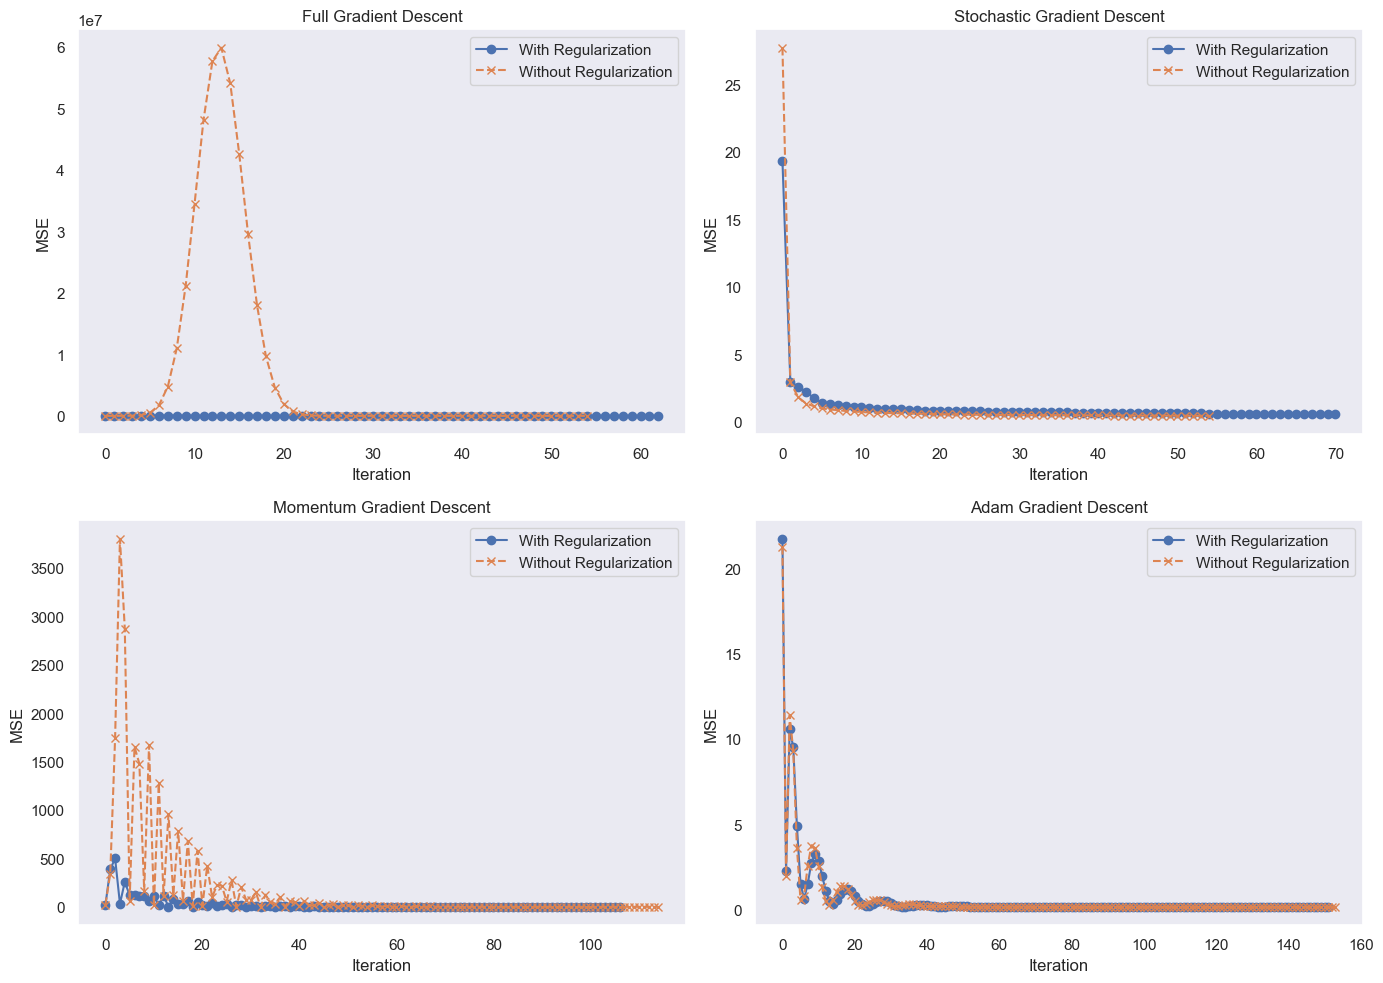

In [ ]:
plt.figure(figsize=(14, 10))

for i, (method, result) in enumerate(model_res_reg.items()):
    best_alpha = result["alpha"]
    best_mu = result["mu"]
    loss_with_reg = result["loss"]

    descent_config_no_reg = {
        'descent_name': method,
        'regularized': False,  
        'kwargs': {
            'dimension': x.shape[1],
            'lambda_': best_alpha
        }
    }

    regression_no_reg = LinearRegression(descent_config=descent_config_no_reg)
    regression_no_reg.fit(xtrain, ytrain)
    loss_without_reg = regression_no_reg.loss_history

    plt.subplot(2, 2, i + 1)
    plt.plot(loss_with_reg, label='With Regularization', linestyle='-', marker='o')
    plt.plot(loss_without_reg, label='Without Regularization', linestyle='--', marker='x')
    plt.title(f"{method.capitalize()} Gradient Descent")
    plt.xlabel("Iteration")
    plt.ylabel("MSE")
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()


Ну вайб будто я где то накосячил, ибо тут нет какого то очев паттерна что с регуляризацией хуже или лучше. Где то реально сходится быстрее, а где то не влияет либо медленнее. Думаю связано все с тем что модели ведут себя по разному в зависимости от регулярзации, соотвественно где то ее можно юзануть и ускорить процесс, а где то она помешает (но не юзать ее тоже как бы бред, ибо она спасает от переообучения).

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

\[
L(y, a) = \log\left(\cosh(a - y)\right)
\]


1. $$
   \frac{d}{da} \log\left(\cosh(a - y)\right) = \frac{1}{\cosh(a - y)} \cdot \frac{d}{da} \cosh(a - y)
   $$

2. $$
   \frac{d}{da} \cosh(a - y) = \sinh(a - y) \cdot \frac{d}{da}(a - y) = \sinh(a - y)
   $$

3. $$
   \frac{d}{da} \log\left(\cosh(a - y)\right) = \frac{\sinh(a - y)}{\cosh(a - y)}
   $$

4. $$
   \frac{d}{da} \log\left(\cosh(a - y)\right) = \tanh(a - y)
   $$
**Ответ:**
$$
\frac{\partial L}{\partial a} = \tanh(a - y)
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент _(требуется показать не только результат, но и промежуточные вычисления)_:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [ ]:
from descents import LossFunction
lambdas = np.logspace(-5, 0, num=10)

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': x.shape[1],
        'lambda_': 0,
        'loss_function': LossFunction.LogCosh
    }
}

model_res_lambda = dict()

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    print(f'=============================\nEvaluating method: {descent_name}\n=============================')
    
    descent_config['descent_name'] = descent_name
    metrics, it_num, best_param = 1e10, 0, 0
    
    for value in lambdas:
        print(f"  Testing lambda = {value:.5f}")
        descent_config['kwargs']['lambda_'] = value
        
        regression = LinearRegression(
            descent_config=descent_config
        )
        
        regression.fit(xtrain, ytrain)
        
        y_pred_val = regression.predict(xval)
        mse = mean_squared_error(y_pred_val, yval)  
        
        y_train_pred = regression.predict(xtrain)
        y_test_pred = regression.predict(xtest)
        r2_train = r2_score(ytrain, y_train_pred)
        r2_test = r2_score(ytest, y_test_pred)
        mse_train = mean_squared_error(y_train_pred, ytrain)
        mse_test = mean_squared_error(y_test_pred, ytest)
        
        print(f"    Validation MSE = {mse:.5f}, Train MSE = {mse_train:.5f}, Test MSE = {mse_test:.5f}")
        print(f"    Train R^2 = {r2_train:.5f}, Test R^2 = {r2_test:.5f}")
        
        if mse < metrics:
            print(f"    New best lambda found: {value:.5f} with Validation MSE = {mse:.5f}")
            metrics, it_num = mse, regression.descent.lr.iteration
            loss = regression.loss_history
            best_param = value
        
    model_res_lambda[descent_name] = {
        "param": best_param,
        "r2": [r2_train, r2_test],
        "mse": [mse_train, mse_test],
        "loss": loss,
        "it_num": it_num
    }
    
    print(f"Best lambda for {descent_name}: {best_param:.5f}")
    print(f"Train MSE: {mse_train:.5f}, Test MSE: {mse_test:.5f}")
    print(f"Train R^2: {r2_train:.5f}, Test R^2: {r2_test:.5f}")
    print(f"Iterations to convergence: {it_num}\n")


Evaluating method: full
  Testing lambda = 0.00001
    Validation MSE = 20.38893, Train MSE = 20.38390, Test MSE = 20.38293
    Train R^2 = -29.55743, Test R^2 = -29.53644
    New best lambda found: 0.00001 with Validation MSE = 20.38893
  Testing lambda = 0.00004
    Validation MSE = 24.77608, Train MSE = 24.80071, Test MSE = 24.75904
    Train R^2 = -36.17865, Test R^2 = -36.09245
  Testing lambda = 0.00013
    Validation MSE = 26.06042, Train MSE = 26.12172, Test MSE = 26.20808
    Train R^2 = -38.15897, Test R^2 = -38.26331
  Testing lambda = 0.00046
    Validation MSE = 25.13711, Train MSE = 25.11627, Test MSE = 25.15255
    Train R^2 = -36.65171, Test R^2 = -36.68199
  Testing lambda = 0.00167
    Validation MSE = 25.11232, Train MSE = 25.15679, Test MSE = 25.28319
    Train R^2 = -36.71246, Test R^2 = -36.87771
  Testing lambda = 0.00599
    Validation MSE = 15.10771, Train MSE = 15.13236, Test MSE = 15.21359
    Train R^2 = -21.68487, Test R^2 = -21.79206
    New best lambda fo

Я уже запутался, но по идее адам и моментумбудут сходится быстрее с регуляризацией. Остальные либо будут медленее либо такие же. Причина? У методом с адаптивным шагом просто шаг автоматически настраивается, поэтому их просто навсего будут меньше штрафовать и поэтому они даже могут и быстрее обучиться. А и ну СГД может оч сильно колбасить из за штрафов.

### Кулинарно-социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, время пробовать новое и делиться теплом с друзьями и близкими. Выберите рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека им. Кратко опишите ваши впечатления, прикрепите рецепт и фотографии блюда и довольного гостя.

`### ваш кулинарный опыт тут ###`

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [ ]:
# YOUR CODE:

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты _(требуется показать не только результат, но и промежуточные вычисления)_:

`### ваше решение тут ###`
![alt text](photo_2023-10-22_04-05-44.jpg)

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [ ]:
# YOUR CODE: Я там что то в дисент.пу написал про лосс функцию, на остальное я думаю нет смысла 
# тратить сили ибо у меня тут какое то рандомизированое гавно и так вышло
